In [1]:
#Much of the scraping code is taken from this repository: https://github.com/chmartin/FBref_EPL
#I've made the the necessary changes for the recently added data and for combining it

In [1]:
# #standard(stats)
# stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
# stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 
# #goalkeeping(keepers)
# keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
# keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
# #advance goalkeeping(keepersadv)
# keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
# keepersadv2 = ["minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
# #shooting(shooting)
# shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# #passing(passing)
# passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
# passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
# #passtypes(passing_types)
# passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
# passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
# #goal and shot creation(gca)
# gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
# gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
# #defensive actions(defense)
# defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
# defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
# #possession(possession)
# possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
# possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
# #playingtime(playingtime)
# playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
# playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
# #miscallaneous(misc)
# misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
# misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [2]:
stats_columns = ["player", "position", "squad", "age","minutes","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
#passing(passing)
passing2 = ["player", "progressive_passes"]
#goal and shot creation(gca)
gca2 = ["player", "sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled"]
#possession(possession)
possession2 = ["player","progressive_carries"]


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv
import lxml
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
%matplotlib widget
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
#Functions to get the data in a dataframe using BeautifulSoup

def get_table(url):
    print("url: " + url)
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    player_table = all_tables[2]
    return player_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                if cell == None:
                    print("Could not get " + f + " for " + str(row))
                    continue
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player


def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table = get_table(url)
    df_player = get_frame(features, player_table)
    return df_player


In [5]:
#Function to get the player data for outfield player, includes all categories - standard stats, shooting
#passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats_columns)
    df3 = frame_for_category('passing',top,end,passing2)
    df5 = frame_for_category('gca',top,end,gca2)
    df7 = frame_for_category('possession',top,end,possession2)
    df = pd.concat([df1, df3, df5, df7], axis=1)
    # df = pd.concat([df1], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [6]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_outfield_21 = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')
df_outfield_21["player"] = df_outfield_21["player"].apply(lambda s: s + " 21")
df_outfield_21["year"] = np.full(len(df_outfield_21), "21")
df_outfield_20 = get_outfield_data('https://fbref.com/en/comps/9/10728/','/2020-2021-Premier-League-Stats')
df_outfield_20["player"] = df_outfield_20["player"].apply(lambda s: s + " 20")
df_outfield_20["year"] = np.full(len(df_outfield_20), "20")
df_outfield_19 = get_outfield_data('https://fbref.com/en/comps/9/3232/','/2019-2020-Premier-League-Stats')
df_outfield_19["player"] = df_outfield_19["player"].apply(lambda s: s + " 19")
df_outfield_19["year"] = np.full(len(df_outfield_19), "19")
df_outfield_18 = get_outfield_data('https://fbref.com/en/comps/9/1889/','/2019-2020-Premier-League-Stats')
df_outfield_18["player"] = df_outfield_18["player"].apply(lambda s: s + " 18")
df_outfield_18["year"] = np.full(len(df_outfield_18), "18")



url: https://fbref.com/en/comps/9/stats/Premier-League-Stats
url: https://fbref.com/en/comps/9/passing/Premier-League-Stats
url: https://fbref.com/en/comps/9/gca/Premier-League-Stats
url: https://fbref.com/en/comps/9/possession/Premier-League-Stats
url: https://fbref.com/en/comps/9/10728/stats/2020-2021-Premier-League-Stats
url: https://fbref.com/en/comps/9/10728/passing/2020-2021-Premier-League-Stats
url: https://fbref.com/en/comps/9/10728/gca/2020-2021-Premier-League-Stats
url: https://fbref.com/en/comps/9/10728/possession/2020-2021-Premier-League-Stats
url: https://fbref.com/en/comps/9/3232/stats/2019-2020-Premier-League-Stats
url: https://fbref.com/en/comps/9/3232/passing/2019-2020-Premier-League-Stats
url: https://fbref.com/en/comps/9/3232/gca/2019-2020-Premier-League-Stats
url: https://fbref.com/en/comps/9/3232/possession/2019-2020-Premier-League-Stats
url: https://fbref.com/en/comps/9/1889/stats/2019-2020-Premier-League-Stats
url: https://fbref.com/en/comps/9/1889/passing/2019-2

In [7]:
df_outfield = pd.concat([df_outfield_18,df_outfield_19, df_outfield_20, df_outfield_21]).reset_index(drop=True)

In [8]:
df_outfield["progressive_passes_per90"] = df_outfield["progressive_passes"]/(df_outfield["minutes"]/90)
df_outfield["progressive_carries_per90"] = df_outfield["progressive_carries"]/(df_outfield["minutes"]/90)

In [9]:
df_outfield.to_csv("season-by-season-comp.csv")

In [10]:
golden_metrics = ["player", "squad", "position", "age", "minutes", "xa_per90", "npxg_per90", "progressive_carries_per90", "progressive_passes_per90", "sca_per90"]
golden_df = df_outfield[golden_metrics]
golden_df["age"] = golden_df["age"].apply(lambda age: int(age.split('-')[0]))


In [11]:
max_age = 35
young_df = golden_df[(golden_df.age <= max_age) & (golden_df.minutes > 300.0)]
# young_df = young_df[young_df.position.apply(lambda s: "MF" in s)]


In [12]:
kpis = ["xa_per90", "npxg_per90", "progressive_carries_per90", "progressive_passes_per90", "sca_per90"]

def normalise_cols(df, cols):
    new_df = pd.DataFrame()
    for c in cols:
        new_df[c] = df[c].apply(lambda v: stats.percentileofscore(df[c], v))
    return new_df

In [13]:
norm_df = normalise_cols(young_df, kpis)
young_df["overall_score"] = norm_df.xa_per90 + norm_df.npxg_per90 + norm_df.progressive_carries_per90 + norm_df.progressive_passes_per90 + norm_df.sca_per90

In [14]:
# young_df = young_df[young_df.squad.apply(lambda s: s in ["Arsenal"])]

In [15]:
young_df["pg_pc_per90"] = young_df.progressive_carries_per90 + young_df.progressive_passes_per90

In [16]:
young_df["xa_npxg_per90"] = young_df.xa_per90 + young_df.npxg_per90

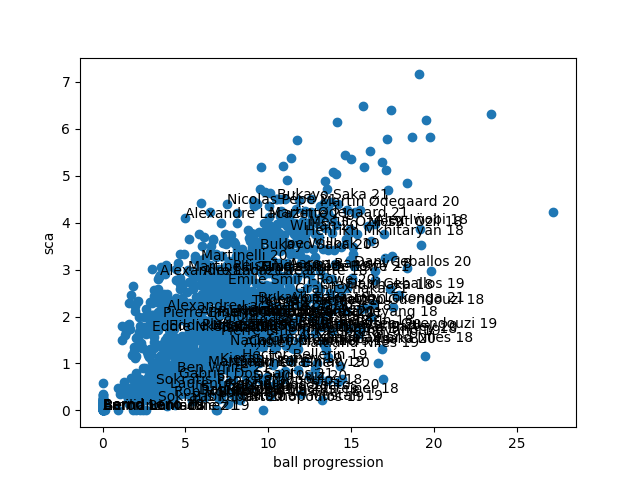

In [17]:
%matplotlib widget
plt.close()
plt.scatter(young_df.pg_pc_per90, young_df.sca_per90)
plt.xlabel("ball progression")
plt.ylabel("sca")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["pg_pc_per90"], row["sca_per90"]))
plt.show()

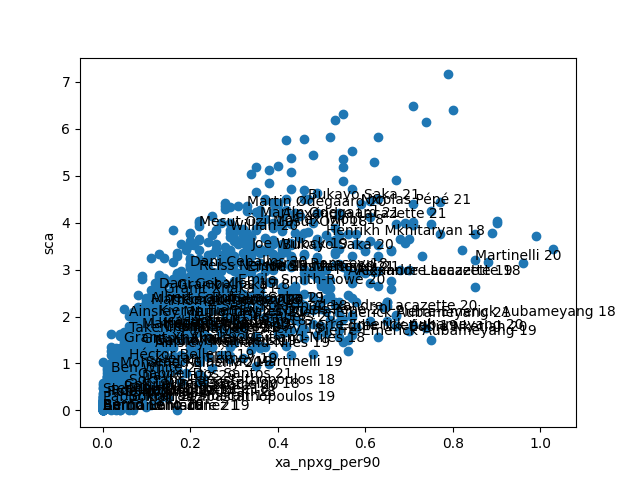

In [33]:
plt.close()
plt.scatter(young_df.xa_npxg_per90, young_df.sca_per90)
plt.xlabel("xa_npxg_per90")
plt.ylabel("sca")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["xa_npxg_per90"], row["sca_per90"]))
plt.show()

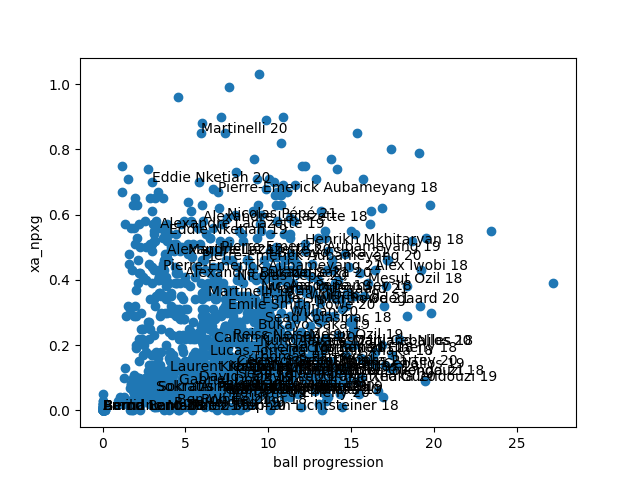

In [34]:
plt.close()
plt.scatter(young_df.pg_pc_per90, young_df.xa_npxg_per90)
plt.xlabel("ball progression")
plt.ylabel("xa_npxg")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["pg_pc_per90"], row["xa_npxg_per90"]))
plt.show()

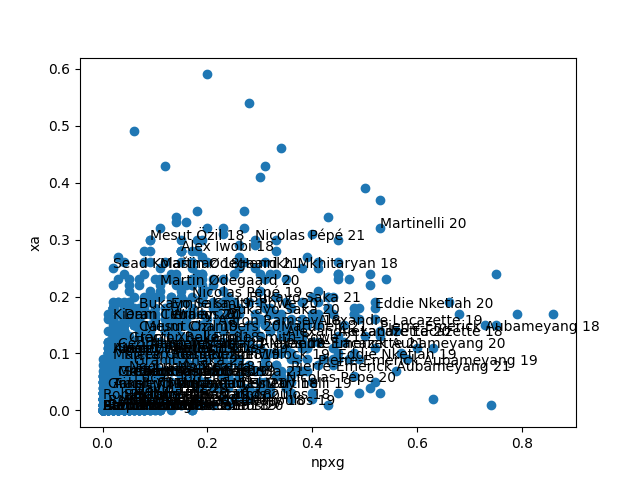

In [35]:
plt.close()
plt.scatter(young_df.npxg_per90, young_df.xa_per90)
plt.xlabel("npxg")
plt.ylabel("xa")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["npxg_per90"], row["xa_per90"]))
plt.show()

<AxesSubplot:>

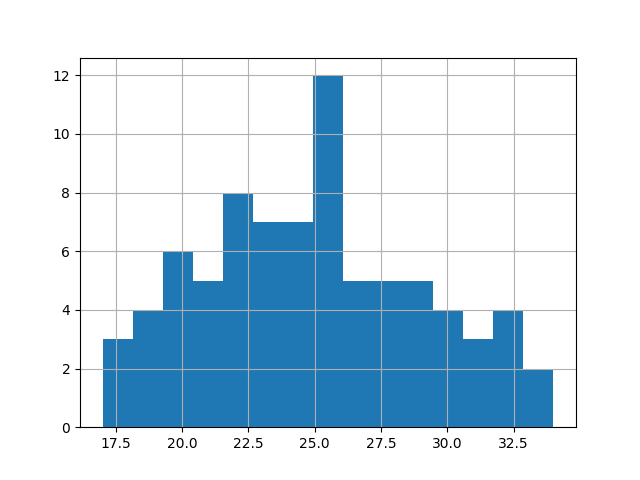

In [20]:
plt.close()
young_df.sort_values("progressive_passes_per90", ascending=False).reset_index(drop=True).head(80).age.hist(bins=15)

In [16]:
young_df.sort_values("overall_score", ascending=False).reset_index(drop=True).head(80)

,player,squad,position,age,minutes,xa_per90,npxg_per90,progressive_carries_per90,progressive_passes_per90,sca_per90,overall_score,pg_pc_per90,xa_npxg_per90
0,Kevin De Bruyne 20,Manchester City,MF,29,1997.0,0.46,0.34,9.599399,7.796695,6.40,486.910828,17.396094,0.80
1,Eden Hazard 18,Chelsea,FW,27,2923.0,0.29,0.26,16.780705,6.619911,6.31,480.095541,23.400616,0.55
2,David Silva 18,Manchester City,MF,32,2401.0,0.35,0.27,9.745939,7.084548,5.29,480.000000,16.830487,0.62
3,David Silva 19,Manchester City,MF,33,1826.0,0.26,0.31,9.216867,6.900329,5.52,478.789809,16.117196,0.57
4,Riyad Mahrez 19,Manchester City,"FW,MF",28,1944.0,0.41,0.30,10.138889,5.555556,6.48,478.375796,15.694444,0.71
5,Kevin De Bruyne 19,Manchester City,MF,28,2791.0,0.59,0.20,10.673594,8.416338,7.16,477.929936,19.089932,0.79
6,Kevin De Bruyne 18,Manchester City,MF,27,975.0,0.32,0.20,10.707692,7.938462,5.82,476.019108,18.646154,0.52
7,Kevin De Bruyne 21,Manchester City,MF,30,674.0,0.43,0.31,7.077151,7.077151,6.14,473.630573,14.154303,0.74
8,Jack Grealish 20,Aston Villa,"FW,MF",24,2185.0,0.35,0.18,12.604119,6.919908,6.18,473.121019,19.524027,0.53
9,Riyad Mahrez 21,Manchester City,FW,30,667.0,0.34,0.43,9.580210,4.182909,4.45,467.515924,13.763118,0.77


In [23]:
young_df.sort_values("sca_per90", ascending=False).reset_index(drop=True).head(80)

,player,squad,position,age,minutes,xa_per90,npxg_per90,progressive_carries_per90,progressive_passes_per90,sca_per90,overall_score,pg_pc_per90,xa_npxg_per90
0,Bukayo Saka 21,Arsenal,"MF,FW",20,1321.0,0.19,0.28,8.175625,2.316427,4.50,406.528662,10.492051,0.47
1,Nicolas Pépé 21,Arsenal,"FW,MF",26,492.0,0.30,0.29,5.670732,1.829268,4.39,385.796178,7.500000,0.59
2,Martin Ødegaard 20,Arsenal,MF,21,866.0,0.22,0.11,8.106236,4.988453,4.36,436.178344,13.094688,0.33
3,Martin Ødegaard 21,Arsenal,MF,23,1067.0,0.25,0.11,5.567010,4.470478,4.13,414.108280,10.037488,0.36
4,Alexandre Lacazette 21,Arsenal,"FW,MF",30,704.0,0.11,0.30,2.428977,2.556818,4.09,330.318471,4.985795,0.41
5,Alex Iwobi 18,Arsenal,"FW,MF",22,1970.0,0.28,0.15,11.604061,4.842640,3.97,451.464968,16.446701,0.43
6,Mesut Özil 18,Arsenal,"MF,FW",29,1735.0,0.30,0.09,9.544669,6.432277,3.94,445.955414,15.976945,0.39
7,Mesut Özil 19,Arsenal,MF,30,1438.0,0.14,0.08,6.947149,5.507650,3.94,408.121019,12.454798,0.22
8,Willian 20,Arsenal,"FW,MF",31,1406.0,0.16,0.13,8.193457,3.136558,3.84,397.866242,11.330014,0.29
9,Henrikh Mkhitaryan 18,Arsenal,"FW,MF",29,1641.0,0.25,0.26,7.239488,4.990859,3.73,450.987261,12.230347,0.51


In [24]:
young_df.sort_values("npxg_per90", ascending=False).reset_index(drop=True).head(80)

,player,squad,position,age,minutes,xa_per90,npxg_per90,progressive_carries_per90,progressive_passes_per90,sca_per90,overall_score,pg_pc_per90,xa_npxg_per90
0,Pierre-Emerick Aubameyang 18,Arsenal,FW,29,2726.0,0.14,0.53,4.754219,2.179017,2.01,334.108280,6.933236,0.67
1,Martinelli 20,Arsenal,FW,19,589.0,0.32,0.53,4.736842,1.222411,3.21,360.222930,5.959253,0.85
2,Eddie Nketiah 20,Arsenal,FW,21,423.0,0.18,0.52,2.340426,0.638298,1.70,273.535032,2.978723,0.70
3,Alexandre Lacazette 18,Arsenal,FW,27,2502.0,0.13,0.45,3.489209,2.589928,2.88,346.146497,6.079137,0.58
4,Eddie Nketiah 19,Arsenal,FW,20,633.0,0.09,0.45,2.701422,1.279621,1.71,259.140127,3.981043,0.54
5,Pierre-Emerick Aubameyang 19,Arsenal,FW,30,3136.0,0.08,0.41,4.907526,2.238520,1.61,303.184713,7.146046,0.49
6,Alexandre Lacazette 19,Arsenal,FW,28,1874.0,0.15,0.41,2.017076,1.440768,2.88,298.853503,3.457844,0.56
7,Pierre-Emerick Aubameyang 21,Arsenal,FW,32,1037.0,0.07,0.36,2.516876,1.128255,2.00,247.929936,3.645130,0.43
8,Alexandre Lacazette 20,Arsenal,FW,29,1923.0,0.13,0.35,1.731669,2.152886,2.15,284.044586,3.884555,0.48
9,Nicolas Pépé 20,Arsenal,FW,25,1616.0,0.05,0.35,5.903465,2.227723,2.06,309.904459,8.131188,0.40
